In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load your datasets (replace with actual file paths)
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('missing_value.csv')

# Transpose the dataframes to switch rows and columns
df1_t = df1.T
df2_t = df2.T

# Check for missing values
missing_columns = df2_t.columns[df2_t.isnull().any()]
if missing_columns.empty:
    print("No missing values found.")
else:
    print("Columns with missing values:", missing_columns)

    # Impute missing values using linear regression for each column
    for col in missing_columns:
        missing_indices = df2_t[col].isnull()
        if not missing_indices.all():
            regressor = LinearRegression()
            regressor.fit(df1_t[~missing_indices], df2_t[col][~missing_indices])
            df2_t[col][missing_indices] = regressor.predict(df1_t[missing_indices])
        else:
            print("No complete data found for column:", col)

# Transpose back to the original orientation
df2_imputed = df2_t.T

# Ensure the columns and index are in the correct order after transposition
df2_imputed.columns = df2.columns
df2_imputed.index = df2.index

# Round the imputed values to omit decimals
df2_imputed = df2_imputed.round(0)

# Print the imputed dataframe
print("\nImputed DataFrame (df2_imputed):")
print(df2_imputed)


Columns with missing values: Index([3, 4, 7, 9, 12], dtype='int64')

Imputed DataFrame (df2_imputed):
        2017      2018      2019
0   192274.0  201191.0  265954.0
1    25181.0   28523.0   26735.0
2     2024.0    2113.0    1904.0
3     4716.0    5237.0    8956.0
4     4105.0    4307.0    5497.0
5    16569.0   15405.0    4181.0
6     1939.0    2166.0    1622.0
7     2670.0    4952.0   18393.0
8    17937.0   18991.0   19968.0
9     4141.0    4141.0    4141.0
10      22.0      14.0      31.0
11      99.0     101.0     369.0
12      19.0      18.0      12.0
13      11.0       7.0       9.0


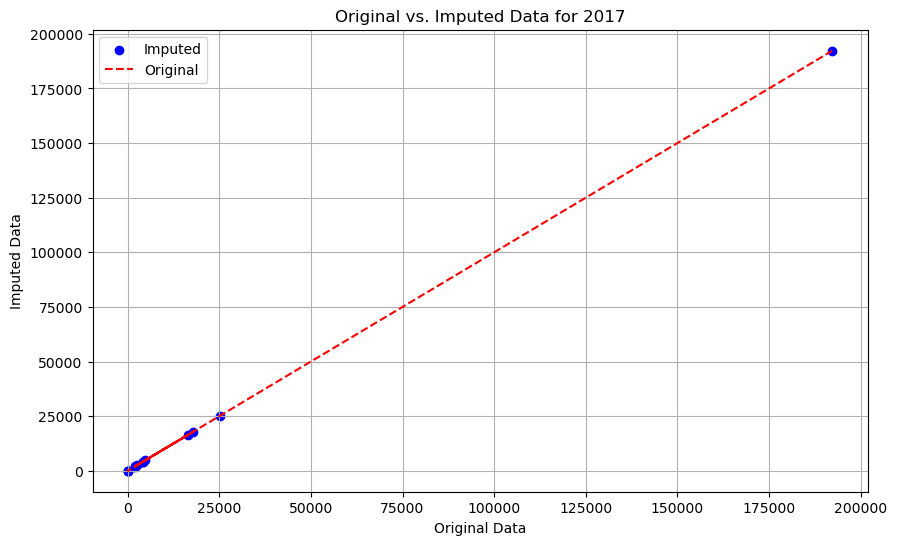

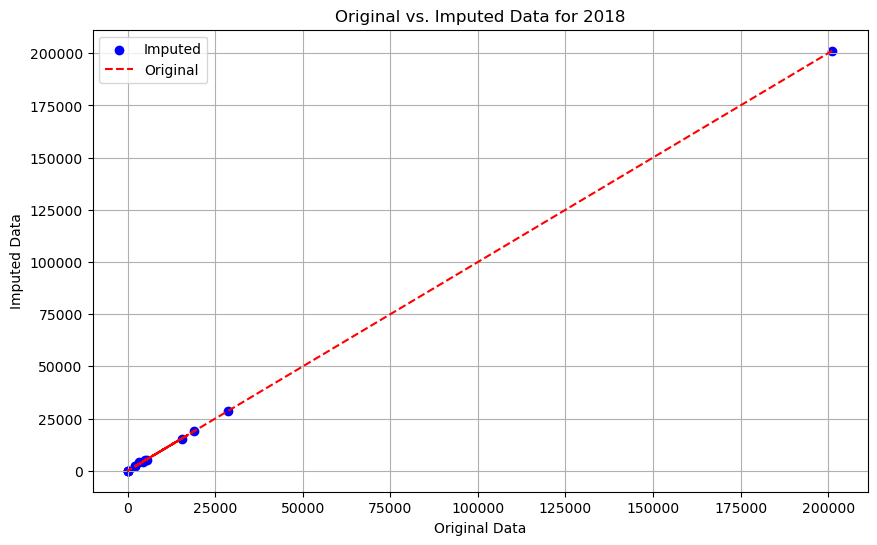

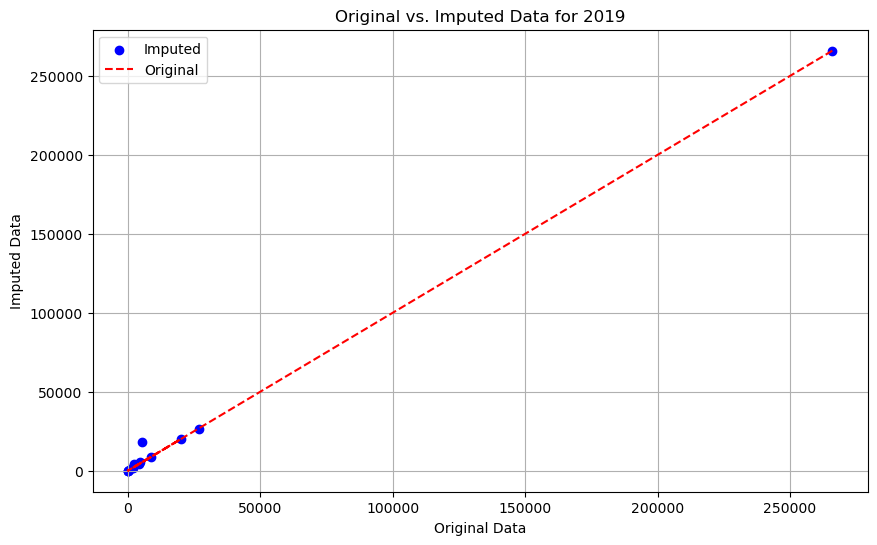

In [5]:
import matplotlib.pyplot as plt

# Plot the original data against the imputed data for each column
for col in df1.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[col], df2_imputed[col], color='blue', label='Imputed')
    plt.plot(df1[col], df1[col], color='red', linestyle='--', label='Original')
    plt.title(f'Original vs. Imputed Data for {col}')
    plt.xlabel('Original Data')
    plt.ylabel('Imputed Data')
    plt.legend()
    plt.grid(True)
    plt.show()


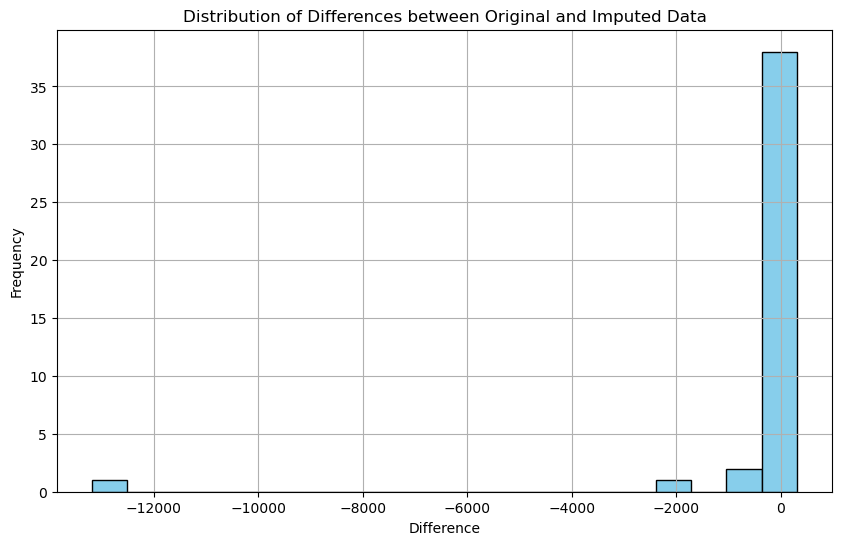

In [6]:
# Calculate the differences between original and imputed data
differences = df1 - df2_imputed

# Flatten the dataframe to a 1D array
differences_flat = differences.values.flatten()

# Plot a histogram of the differences
plt.figure(figsize=(10, 6))
plt.hist(differences_flat, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Differences between Original and Imputed Data')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


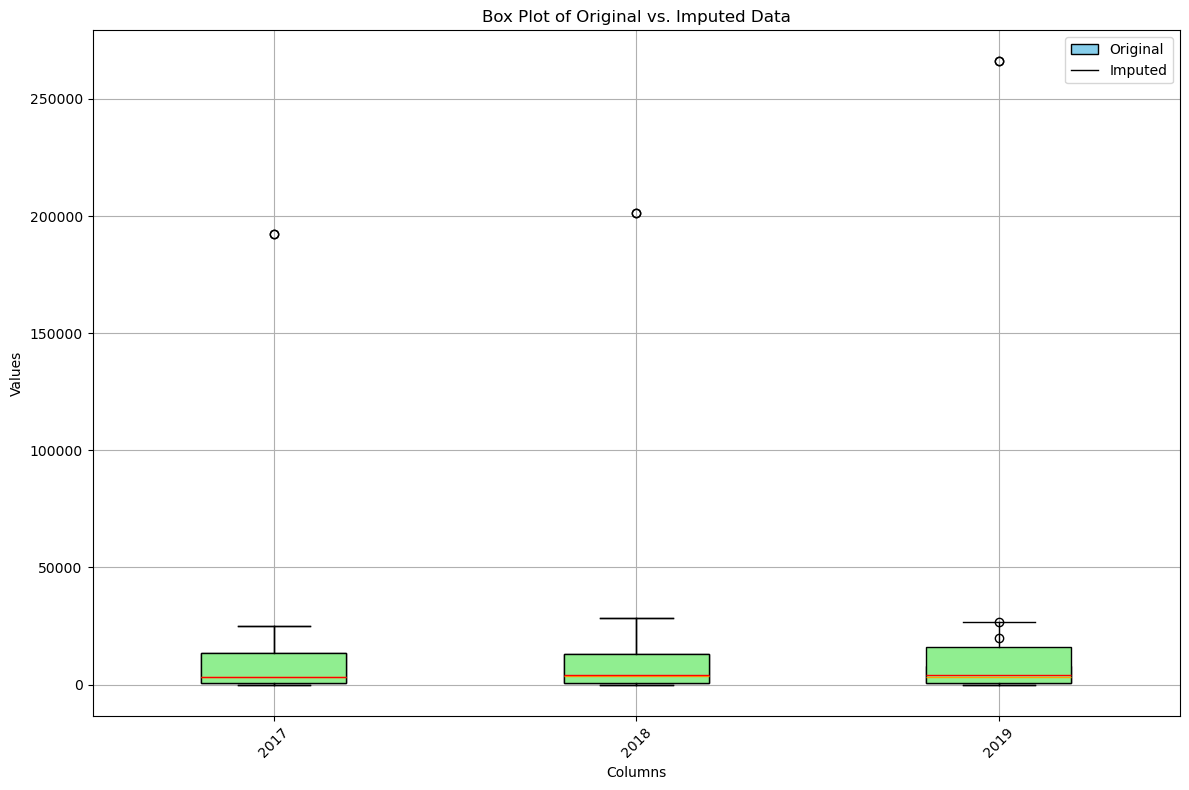

In [7]:
# Create box plots for each column in the original and imputed data
plt.figure(figsize=(12, 8))
plt.boxplot([df1[col] for col in df1.columns], positions=range(1, len(df1.columns) + 1), widths=0.4, patch_artist=True, boxprops=dict(facecolor='skyblue'), medianprops=dict(color='orange'))
plt.boxplot([df2_imputed[col] for col in df2_imputed.columns], positions=range(1, len(df2_imputed.columns) + 1), widths=0.4, patch_artist=True, boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='red'))

plt.xticks(range(1, len(df1.columns) + 1), df1.columns, rotation=45)
plt.title('Box Plot of Original vs. Imputed Data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend(['Original', 'Imputed'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already executed the previous code for imputation and have df1 and df2_imputed dataframes

# Check the column names in your dataframe
print("Column names in df1:", df1.columns)
print("Column names in df2_imputed:", df2_imputed.columns)

# Prompt the user to enter a valid column name
column_to_visualize = input("Enter the name of the column you want to visualize: ")

# Check if the entered column name exists
if column_to_visualize in df1.columns and column_to_visualize in df2_imputed.columns:
    # Create a box plot for the selected column in the original and imputed data
    plt.figure(figsize=(8, 6))
    plt.boxplot([df1[column_to_visualize], df2_imputed[column_to_visualize]], patch_artist=True, widths=0.5, labels=['Original', 'Imputed'], boxprops=dict(facecolor=('skyblue', 'lightgreen')))
    plt.title(f'Box Plot of {column_to_visualize}')
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()
else:
    print("Invalid column name. Please enter a valid column name from the dataset.")



Column names in df1: Index(['2017', '2018', '2019'], dtype='object')
Column names in df2_imputed: Index(['2017', '2018', '2019'], dtype='object')


Enter the name of the column you want to visualize:  years


Invalid column name. Please enter a valid column name from the dataset.


In [11]:
import matplotlib.pyplot as plt

# Choose the columns you want to plot
x_column = 'column_name_from_df1'  # Replace 'column_name_from_df1' with the actual column name from df1
y_column = 'column_name_from_df2'  # Replace 'column_name_from_df2' with the actual column name from df2_imputed

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df1[x_column], df2_imputed[y_column], color='blue', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('X Axis Label')  # Replace 'X Axis Label' with an appropriate label for the x-axis
plt.ylabel('Y Axis Label')  # Replace 'Y Axis Label' with an appropriate label for the y-axis
plt.grid(True)
plt.show()


KeyError: 'column_name_from_df1'

<Figure size 800x600 with 0 Axes>